In [1]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn import model_selection
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score,matthews_corrcoef
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
from scipy.stats import ks_2samp,ttest_ind,mannwhitneyu

In [2]:
for i in range(8):
    if i==0:
        train = pd.read_pickle('salida/nuevo4i/RTE3/DEV_'+str(i+1)+'.csv_.pickle')
    else:
        try:
            temp = pd.read_pickle('salida/nuevo4i/RTE3/DEV_'+str(i+1)+'.csv_.pickle')
            train=pd.concat([train,temp])
        except:
            pass

In [3]:
train=train.reset_index(drop=True)
train

,distancias,entropia_total,entropias,mutinf,mearts,max_info,sumas,semantics,nlp_semantics,mutinf_t,...,list_m,list_T,Jaro-Winkler_rit,KL_divergence,negT,verbT,negH,verbH,overlap_ent,clases
0,0.0,0.938754,0.000000,0.000000,0.00000,0.000000,0.000000,1.000000,1.000000,1.561414,...,0,25,0.000000,0.000000,0,,0,,0.500000,YES
1,0.0,1.624541,0.000000,0.000000,0.00000,0.000000,0.000000,1.000000,1.000000,2.706102,...,0,25,0.600000,0.000000,0,,0,,0.333333,NO
2,0.0,1.894108,0.000000,0.000000,0.00000,0.000000,0.000000,1.000000,1.000000,4.375355,...,0,19,0.200000,0.000000,0,,0,,0.250000,UNKNOWN
3,0.0,1.989939,0.000000,0.000000,0.00000,0.000000,0.000000,1.000000,1.000000,4.503376,...,0,32,1.000000,0.000000,0,,0,,0.333333,YES
4,0.0,1.949269,0.000000,0.000000,0.00000,0.000000,0.000000,1.000000,1.000000,3.631440,...,0,13,0.400000,0.000000,0,,0,,0.666667,YES
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
795,1.0,1.905533,1.781937,3.849615,0.00377,0.329502,0.102195,0.500263,0.500263,3.587219,...,1,15,0.400000,0.196467,0,,0,,0.500000,UNKNOWN
796,0.0,1.995499,0.000000,0.000000,0.00000,0.000000,0.000000,1.000000,1.000000,4.165892,...,0,22,0.777778,0.000000,0,,0,,0.666667,YES
797,0.0,1.491480,0.000000,0.000000,0.00000,0.000000,0.000000,1.000000,1.000000,3.157142,...,0,19,0.666667,0.000000,0,,0,,0.500000,UNKNOWN
798,0.0,1.650882,0.000000,0.000000,0.00000,0.000000,0.000000,1.000000,1.000000,3.808481,...,0,21,1.000000,0.000000,0,,0,,1.000000,NO


In [4]:
train.columns

Index(['distancias', 'entropia_total', 'entropias', 'mutinf', 'mearts',
       'max_info', 'sumas', 'semantics', 'nlp_semantics', 'mutinf_t',
       'mearts_t', 'max_info_t', 'sumas_t', 'entail', 'contra', 'neutral',
       'no_match', 'rel_conceptuales', 'list_comp', 'diferencias',
       'list_incomp', 'entropia_relaciones', 'list_M', 'list_m', 'list_T',
       'Jaro-Winkler_rit', 'KL_divergence', 'negT', 'verbT', 'negH', 'verbH',
       'overlap_ent', 'clases'],
      dtype='object')

In [5]:
#train["mutinfx"]=train["mutinf"]/train["mutinf_t"]
train["mutinf"]=train["mutinf_t"]-train["mutinf"]
#train["max_infox"]=train["max_info"]/train["max_info_t"]
train["max_info"]=train["max_info_t"]-train["max_info"]
#train["mearts"]=train["mearts"]/train["mearts_t"]
#train["entropiasx"]=train["entropias"]/train["entropia_total"]
train["entropias"]=train["entropia_total"]-train["entropias"]
#train["sumasx"]=train["sumas"]/train["sumas_t"]
train["sumas"]=train["sumas_t"]-train["sumas"]
train["list_m"]=train["list_m"]/train["list_M"]
#train["list_mxx"]=train["list_M"]-train["list_m"]

array([<Axes: title={'center': 'semantics'}, xlabel='clases'>,
       <Axes: title={'center': 'nlp_semantics'}, xlabel='clases'>],
      dtype=object)

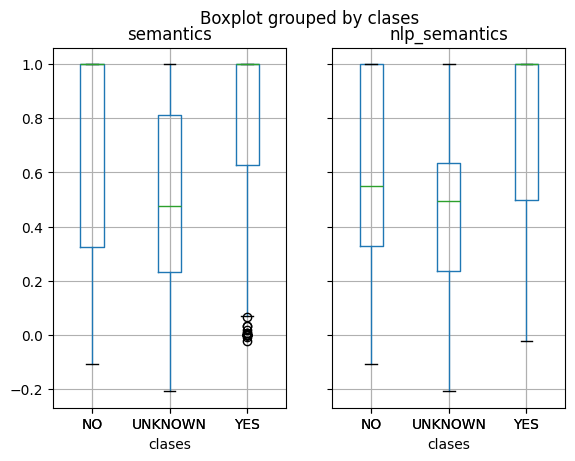

In [6]:
train.boxplot(by="clases",column=["semantics","nlp_semantics"])

<Axes: title={'center': 'list_m'}, xlabel='clases'>

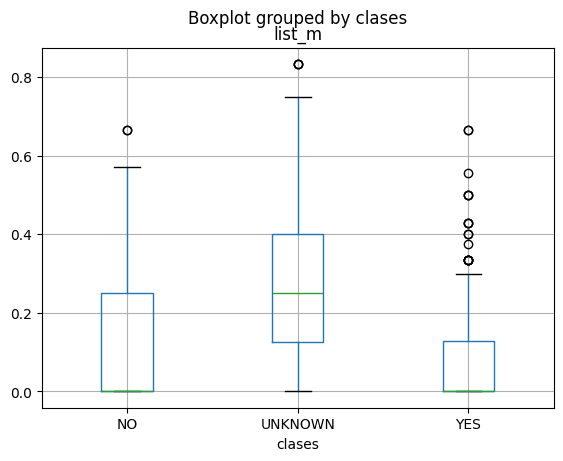

In [7]:
train.boxplot(by="clases",column=["list_m"])

In [8]:
train.columns

Index(['distancias', 'entropia_total', 'entropias', 'mutinf', 'mearts',
       'max_info', 'sumas', 'semantics', 'nlp_semantics', 'mutinf_t',
       'mearts_t', 'max_info_t', 'sumas_t', 'entail', 'contra', 'neutral',
       'no_match', 'rel_conceptuales', 'list_comp', 'diferencias',
       'list_incomp', 'entropia_relaciones', 'list_M', 'list_m', 'list_T',
       'Jaro-Winkler_rit', 'KL_divergence', 'negT', 'verbT', 'negH', 'verbH',
       'overlap_ent', 'clases'],
      dtype='object')

In [9]:
#train["entropia_total"]=train["entropias"]*train["entropia_total"]

array([<Axes: title={'center': 'sumas'}, xlabel='clases'>,
       <Axes: title={'center': 'sumas_t'}, xlabel='clases'>], dtype=object)

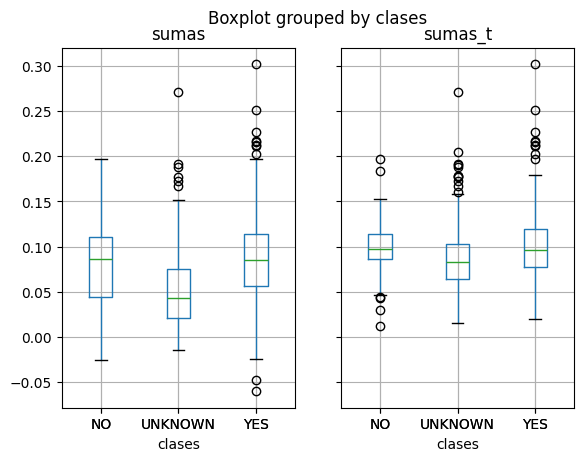

In [10]:
train.boxplot(by="clases",column=["sumas","sumas_t"])

array([<Axes: title={'center': 'entropias'}, xlabel='clases'>,
       <Axes: title={'center': 'entropia_total'}, xlabel='clases'>],
      dtype=object)

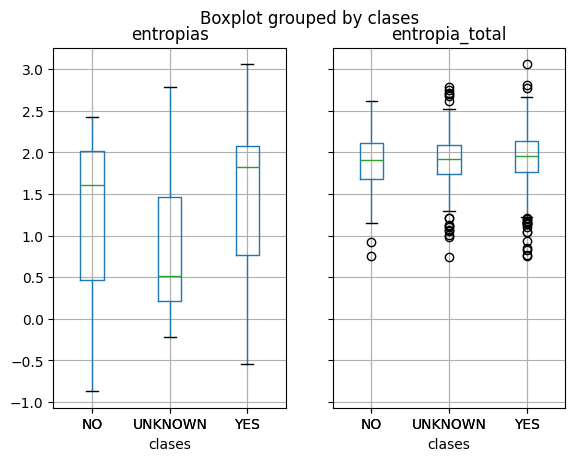

In [11]:
train.boxplot(by="clases",column=["entropias","entropia_total"])

<Axes: title={'center': 'entropias'}, xlabel='clases'>

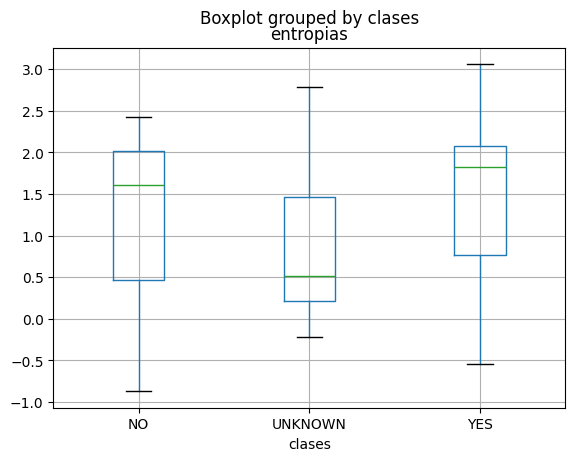

In [12]:
train.boxplot(by="clases",column=["entropias"])

array([<Axes: title={'center': 'mutinf'}, xlabel='clases'>,
       <Axes: title={'center': 'mutinf_t'}, xlabel='clases'>],
      dtype=object)

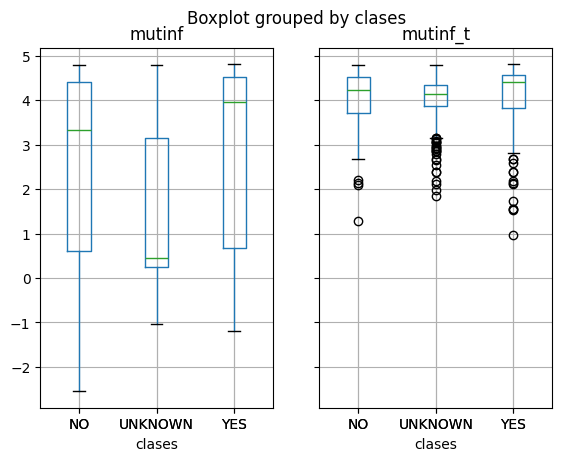

In [13]:
train.boxplot(by="clases",column=["mutinf","mutinf_t"])

# Integrar características

In [14]:
# train["mutinf"]=train["mutinf_t"]-train["mutinf"]
# train["max_info"]=train["max_info_t"]-train["max_info"]
# # #train["mearts"]=train["mearts"]/train["mearts_t"]
# train["entropias"]=train["entropia_total"]-train["entropias"]
# train["sumas"]=train["sumas_t"]-train["sumas"]
# # train["list_m"]=train["list_m"]/train["list_M"]
# # train=train.drop(["verbT","verbH","KL_divergence","entropia_total","mutinf_t","max_info_t",
# #                   "mearts_t","sumas_t","list_M"],axis=1)

array([<Axes: title={'center': 'sumas'}, xlabel='clases'>,
       <Axes: title={'center': 'sumas_t'}, xlabel='clases'>], dtype=object)

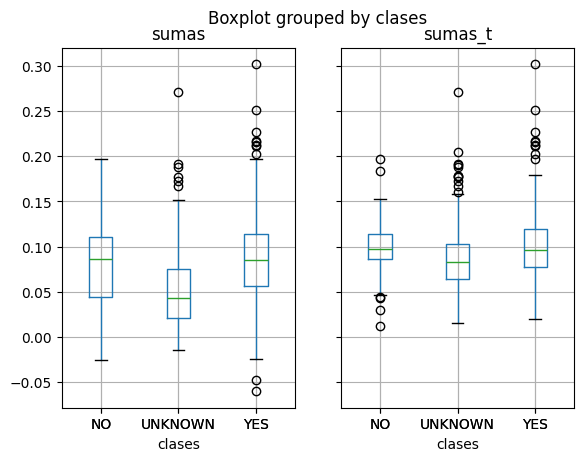

In [15]:
train.boxplot(by="clases",column=["sumas","sumas_t"])

array([<Axes: title={'center': 'mutinf'}, xlabel='clases'>,
       <Axes: title={'center': 'mutinf_t'}, xlabel='clases'>],
      dtype=object)

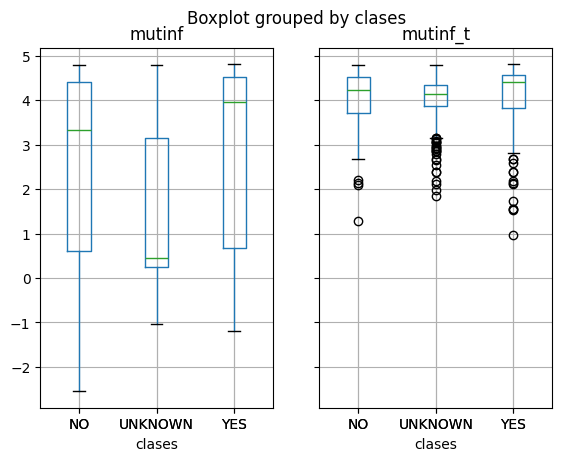

In [16]:
train.boxplot(by="clases",column=["mutinf","mutinf_t"])

array([<Axes: title={'center': 'entropias'}, xlabel='clases'>,
       <Axes: title={'center': 'entropia_total'}, xlabel='clases'>],
      dtype=object)

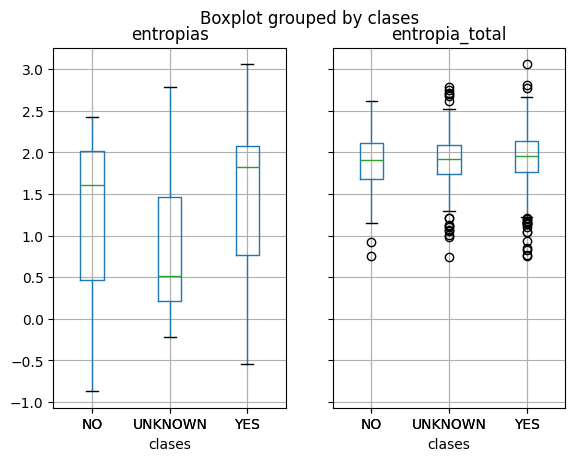

In [17]:
train.boxplot(by="clases",column=["entropias","entropia_total"])

<Axes: title={'center': 'contra'}, xlabel='clases'>

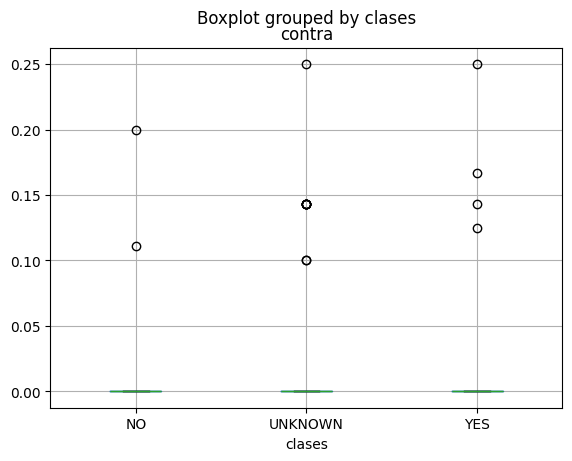

In [18]:
train.boxplot(by="clases",column=["contra"])

In [19]:
# train["mearts"]=train["mearts"]*train["distancias"]
# train=train.drop(["distancias","list_incomp","negH","max_info",'contra','neutral','list_comp','list_T','negT'],axis=1)

In [20]:
train=train.drop(["verbT","verbH"],axis=1)

In [21]:
train.columns

Index(['distancias', 'entropia_total', 'entropias', 'mutinf', 'mearts',
       'max_info', 'sumas', 'semantics', 'nlp_semantics', 'mutinf_t',
       'mearts_t', 'max_info_t', 'sumas_t', 'entail', 'contra', 'neutral',
       'no_match', 'rel_conceptuales', 'list_comp', 'diferencias',
       'list_incomp', 'entropia_relaciones', 'list_M', 'list_m', 'list_T',
       'Jaro-Winkler_rit', 'KL_divergence', 'negT', 'negH', 'overlap_ent',
       'clases'],
      dtype='object')

In [22]:
#train = train[['entropia_relaciones','Jaro-Winkler_rit','overlap_ent','no_match', 'contra', 'entail',  'neutral','clases']]
train = train[['negH','negT','mutinf','max_info','list_comp', 'list_incomp', 'rel_conceptuales','diferencias','entropia_relaciones','nlp_semantics','overlap_ent','Jaro-Winkler_rit','clases']]

In [23]:
for c in train.columns[:-1]:
    # Datos de las calificaciones de los dos grupos
    grupo_a = train[(train['clases']=="UNKNOWN") | (train['clases']=="NO")][c]
    grupo_b = train[(train['clases']=="YES")][c]

    # Realizamos una prueba t de dos muestras independientes
    t_stat, p_valor = ttest_ind(grupo_a, grupo_b)

    # Establecemos un nivel de significancia (alfa)
    alfa = 0.001

    # Comprobamos si rechazamos la hipótesis nula
    if p_valor < alfa:
        #print("Hay una diferencia significativa entre los grupos.",c,p_valor)
        pass
    else:
        print("No hay evidencia de una diferencia significativa entre los grupos.",c)

No hay evidencia de una diferencia significativa entre los grupos. negH
No hay evidencia de una diferencia significativa entre los grupos. negT
No hay evidencia de una diferencia significativa entre los grupos. list_incomp


In [24]:
for c in train.columns[:-1]:
    # Datos de las calificaciones de los dos grupos
    grupo_a = train[(train['clases']=="UNKNOWN") | (train['clases']=="NO")][c]
    grupo_b = train[(train['clases']=="YES")][c]

    # Realizamos una prueba k2 de dos muestras independientes
    stat, p_valor = ks_2samp(grupo_a, grupo_b)

    # Establecemos un nivel de significancia (alfa)
    alfa = 0.001

    # Comprobamos si rechazamos la hipótesis nula
    if p_valor < alfa:
        #print("Hay una diferencia significativa entre los grupos.",c,p_valor)
        pass
    else:
        print("No hay evidencia de una diferencia significativa entre los grupos.",c)

No hay evidencia de una diferencia significativa entre los grupos. negH
No hay evidencia de una diferencia significativa entre los grupos. negT
No hay evidencia de una diferencia significativa entre los grupos. list_comp
No hay evidencia de una diferencia significativa entre los grupos. list_incomp


In [25]:
from scipy.stats import mannwhitneyu

for c in train.columns[:-1]:
    # Datos de las calificaciones de los dos grupos
    grupo_a = train[(train['clases']=="UNKNOWN") | (train['clases']=="NO")][c]
    grupo_b = train[(train['clases']=="YES")][c]

    # Realizamos una prueba mannwhitneyu de dos muestras independientes
    stat, p_valor = mannwhitneyu(grupo_a, grupo_b, use_continuity=False)

    # Establecemos un nivel de significancia (alfa)
    alfa = 0.001

    # Comprobamos si rechazamos la hipótesis nula
    if p_valor < alfa:
        #print("Hay una diferencia significativa entre los grupos.",c,p_valor)
        pass
    else:
        print("No hay evidencia de una diferencia significativa entre los grupos.",c)

No hay evidencia de una diferencia significativa entre los grupos. negH
No hay evidencia de una diferencia significativa entre los grupos. negT
No hay evidencia de una diferencia significativa entre los grupos. list_incomp


## Eliminar características

In [26]:
train

,negH,negT,mutinf,max_info,list_comp,list_incomp,rel_conceptuales,diferencias,entropia_relaciones,nlp_semantics,overlap_ent,Jaro-Winkler_rit,clases
0,0,0,1.561414,0.333333,0,0,0,0.000000,0.000000,1.000000,0.500000,0.000000,YES
1,0,0,2.706102,0.504683,1,0,0,0.000000,0.000000,1.000000,0.333333,0.600000,NO
2,0,0,4.375355,0.802840,2,0,0,0.000000,0.000000,1.000000,0.250000,0.200000,UNKNOWN
3,0,0,4.503376,1.000000,0,0,0,0.000000,0.000000,1.000000,0.333333,1.000000,YES
4,0,0,3.631440,0.676320,1,0,0,0.000000,0.000000,1.000000,0.666667,0.400000,YES
...,...,...,...,...,...,...,...,...,...,...,...,...,...
795,0,0,-0.262397,0.336399,0,0,0,0.066667,0.721928,0.500263,0.500000,0.400000,UNKNOWN
796,0,0,4.165892,0.888889,0,0,0,0.000000,0.000000,1.000000,0.666667,0.777778,YES
797,0,0,3.157142,0.666667,0,0,0,0.000000,0.000000,1.000000,0.500000,0.666667,UNKNOWN
798,0,0,3.808481,0.800000,0,0,0,0.000000,0.000000,1.000000,1.000000,1.000000,NO


In [27]:
train.columns

Index(['negH', 'negT', 'mutinf', 'max_info', 'list_comp', 'list_incomp',
       'rel_conceptuales', 'diferencias', 'entropia_relaciones',
       'nlp_semantics', 'overlap_ent', 'Jaro-Winkler_rit', 'clases'],
      dtype='object')

In [28]:
# Guardar un nuevo dataframe para la correlación de variables
train_m=train.drop(['clases'],axis=1).corr(method='kendall')

In [29]:
train_m

,negH,negT,mutinf,max_info,list_comp,list_incomp,rel_conceptuales,diferencias,entropia_relaciones,nlp_semantics,overlap_ent,Jaro-Winkler_rit
negH,1.000000,0.091520,-0.048791,-0.037611,-0.033431,0.101964,-0.009003,0.041020,0.035836,-0.021820,0.042112,0.031191
negT,0.091520,1.000000,0.029696,0.036184,0.012869,-0.010385,-0.028213,-0.044391,-0.059226,0.073839,0.041133,0.070810
mutinf,-0.048791,0.029696,1.000000,0.750660,-0.221089,-0.029977,-0.122838,-0.597338,-0.527960,0.432775,0.259912,0.277599
max_info,-0.037611,0.036184,0.750660,1.000000,-0.291581,-0.066708,-0.166310,-0.601973,-0.555123,0.401071,0.322160,0.332706
list_comp,-0.033431,0.012869,-0.221089,-0.291581,1.000000,-0.009765,0.076027,0.148914,0.107661,-0.066339,-0.292361,-0.111507
list_incomp,0.101964,-0.010385,-0.029977,-0.066708,-0.009765,1.000000,0.194601,0.059830,0.205319,-0.071181,-0.019157,-0.055491
rel_conceptuales,-0.009003,-0.028213,-0.122838,-0.166310,0.076027,0.194601,1.000000,0.108319,0.523560,-0.265165,-0.182488,-0.226920
diferencias,0.041020,-0.044391,-0.597338,-0.601973,0.148914,0.059830,0.108319,1.000000,0.654170,-0.525211,-0.272065,-0.304545
entropia_relaciones,0.035836,-0.059226,-0.527960,-0.555123,0.107661,0.205319,0.523560,0.654170,1.000000,-0.567902,-0.306076,-0.369994
nlp_semantics,-0.021820,0.073839,0.432775,0.401071,-0.066339,-0.071181,-0.265165,-0.525211,-0.567902,1.000000,0.220615,0.242351


<Axes: >

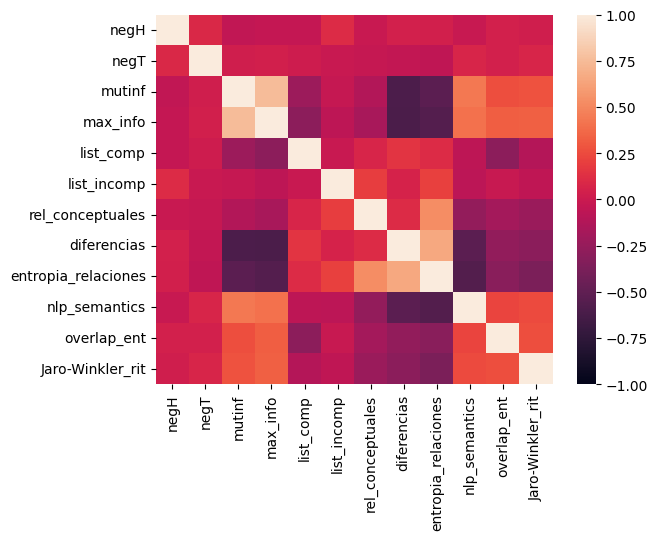

In [30]:
sns.heatmap(train_m,vmin=-1,vmax=1)

In [31]:
train_m

,negH,negT,mutinf,max_info,list_comp,list_incomp,rel_conceptuales,diferencias,entropia_relaciones,nlp_semantics,overlap_ent,Jaro-Winkler_rit
negH,1.000000,0.091520,-0.048791,-0.037611,-0.033431,0.101964,-0.009003,0.041020,0.035836,-0.021820,0.042112,0.031191
negT,0.091520,1.000000,0.029696,0.036184,0.012869,-0.010385,-0.028213,-0.044391,-0.059226,0.073839,0.041133,0.070810
mutinf,-0.048791,0.029696,1.000000,0.750660,-0.221089,-0.029977,-0.122838,-0.597338,-0.527960,0.432775,0.259912,0.277599
max_info,-0.037611,0.036184,0.750660,1.000000,-0.291581,-0.066708,-0.166310,-0.601973,-0.555123,0.401071,0.322160,0.332706
list_comp,-0.033431,0.012869,-0.221089,-0.291581,1.000000,-0.009765,0.076027,0.148914,0.107661,-0.066339,-0.292361,-0.111507
list_incomp,0.101964,-0.010385,-0.029977,-0.066708,-0.009765,1.000000,0.194601,0.059830,0.205319,-0.071181,-0.019157,-0.055491
rel_conceptuales,-0.009003,-0.028213,-0.122838,-0.166310,0.076027,0.194601,1.000000,0.108319,0.523560,-0.265165,-0.182488,-0.226920
diferencias,0.041020,-0.044391,-0.597338,-0.601973,0.148914,0.059830,0.108319,1.000000,0.654170,-0.525211,-0.272065,-0.304545
entropia_relaciones,0.035836,-0.059226,-0.527960,-0.555123,0.107661,0.205319,0.523560,0.654170,1.000000,-0.567902,-0.306076,-0.369994
nlp_semantics,-0.021820,0.073839,0.432775,0.401071,-0.066339,-0.071181,-0.265165,-0.525211,-0.567902,1.000000,0.220615,0.242351


In [32]:
coor=pd.DataFrame(np.tril(train_m,-1),index=train_m.columns,columns=train_m.columns)
coor

,negH,negT,mutinf,max_info,list_comp,list_incomp,rel_conceptuales,diferencias,entropia_relaciones,nlp_semantics,overlap_ent,Jaro-Winkler_rit
negH,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
negT,0.091520,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
mutinf,-0.048791,0.029696,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
max_info,-0.037611,0.036184,0.750660,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
list_comp,-0.033431,0.012869,-0.221089,-0.291581,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
list_incomp,0.101964,-0.010385,-0.029977,-0.066708,-0.009765,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
rel_conceptuales,-0.009003,-0.028213,-0.122838,-0.166310,0.076027,0.194601,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
diferencias,0.041020,-0.044391,-0.597338,-0.601973,0.148914,0.059830,0.108319,0.000000,0.000000,0.000000,0.000000,0.0
entropia_relaciones,0.035836,-0.059226,-0.527960,-0.555123,0.107661,0.205319,0.523560,0.654170,0.000000,0.000000,0.000000,0.0
nlp_semantics,-0.021820,0.073839,0.432775,0.401071,-0.066339,-0.071181,-0.265165,-0.525211,-0.567902,0.000000,0.000000,0.0


In [33]:
cols=train_m.columns
temp=coor.copy()
for index, strings in temp.iterrows():
    for c in cols:
        if strings[c]>0.7:
            print(index,c,strings[c])

max_info mutinf 0.7506596659193978


In [34]:
cols=train_m.columns
temp=coor.copy()
for index, strings in temp.iterrows():
    for c in cols:
        if strings[c]<-0.7:
            print(index,c,strings[c])

In [35]:
# Checar variables colineales
#sns.relplot(data=train_m, x="mutinf", y="sumas")

In [36]:
# train=train.drop(["entail","list_m"],axis=1)

In [37]:
train.columns

Index(['negH', 'negT', 'mutinf', 'max_info', 'list_comp', 'list_incomp',
       'rel_conceptuales', 'diferencias', 'entropia_relaciones',
       'nlp_semantics', 'overlap_ent', 'Jaro-Winkler_rit', 'clases'],
      dtype='object')

In [38]:
X = train.drop(['clases'],axis=1)
y_ = train['clases']

In [39]:
# RTE3
y_train=[]
for i in y_:
    if i == "YES":
        y_train.append(1)
    else:
        y_train.append(0)

In [40]:
scaler = preprocessing.MaxAbsScaler().fit(X)
X_scaled = scaler.transform(X)
X = X_scaled
X_train=X

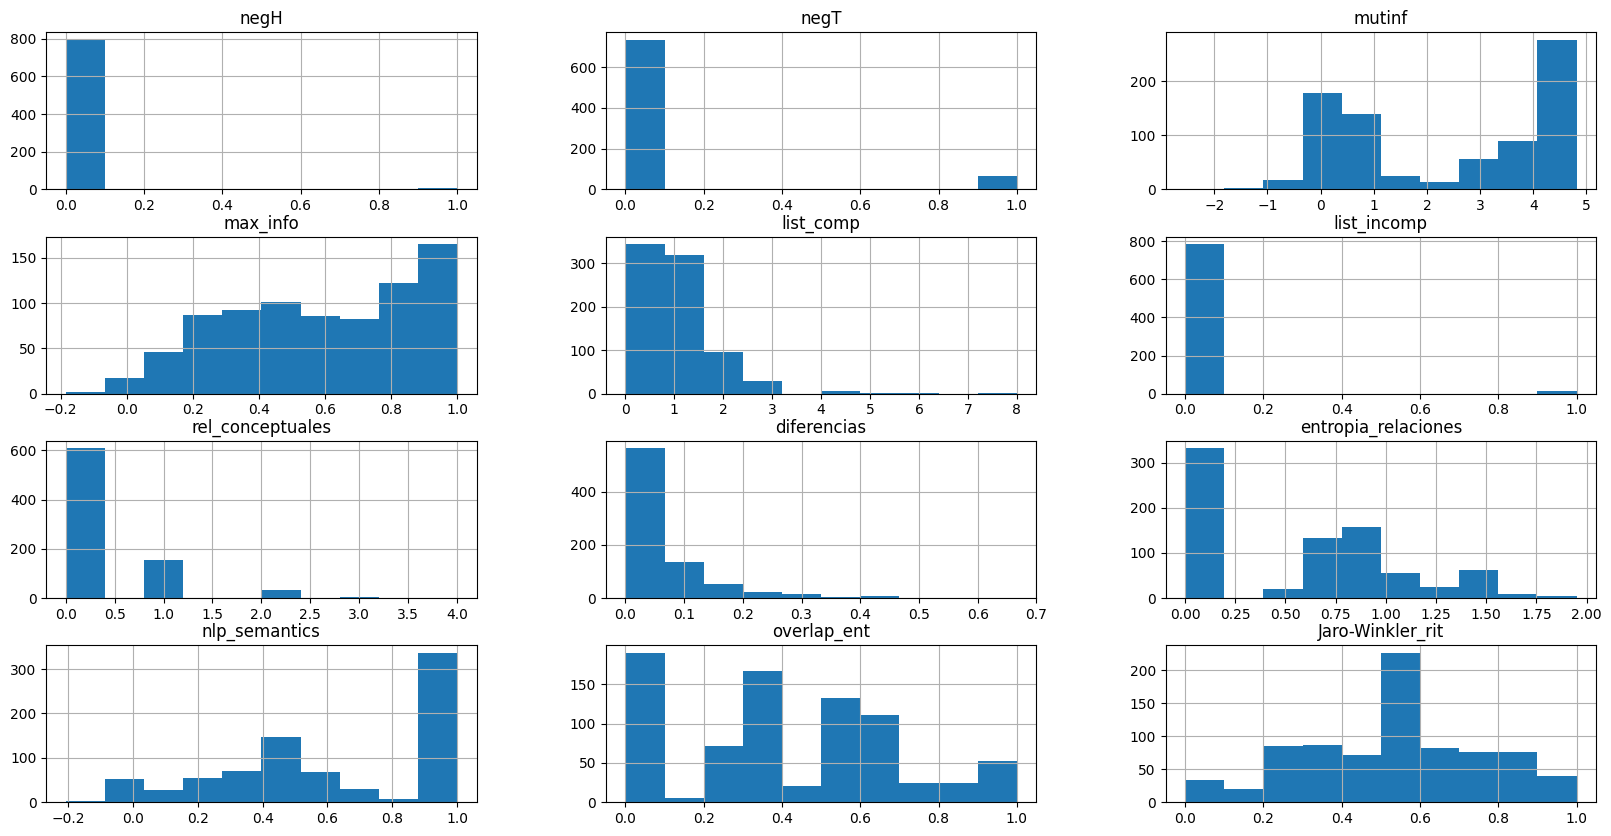

In [41]:
train.hist(figsize=(20,10))
plt.show()

# TEST

In [42]:
for i in range(8):
    if i==0:
        test = pd.read_pickle('salida/nuevo4i/RTE3/TEST_'+str(i+1)+'.csv_.pickle')
    else:
        try:
            temp = pd.read_pickle('salida/nuevo4i/RTE3/TEST_'+str(i+1)+'.csv_.pickle')
            test=pd.concat([test,temp])
        except:
            pass

In [43]:
test = test.reset_index(drop=True)
test

,distancias,entropia_total,entropias,mutinf,mearts,max_info,sumas,semantics,nlp_semantics,mutinf_t,...,list_m,list_T,Jaro-Winkler_rit,KL_divergence,negT,verbT,negH,verbH,overlap_ent,clases
0,0.000000,2.230984,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,4.434350,...,0,24,0.400000,0.000000,0,,0,,0.666667,YES
1,0.000000,2.068941,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,4.429481,...,0,24,0.600000,0.000000,0,,0,,0.333333,YES
2,0.000000,1.784534,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,3.155371,...,0,13,0.750000,0.000000,0,,0,,0.666667,YES
3,0.000000,1.866607,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,3.957290,...,0,18,0.833333,0.000000,0,,0,,1.000000,YES
4,1.000001,1.576721,1.807764,3.880129,0.004272,0.201056,0.046052,0.369879,0.369879,3.339943,...,1,17,0.750000,0.502912,0,,0,,1.000000,NO
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
795,0.000000,2.183050,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,4.383406,...,0,18,0.400000,0.000000,1,rush,0,,0.500000,YES
796,0.000000,1.546023,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,3.178976,...,0,22,0.666667,0.000000,0,,0,,0.333333,NO
797,0.000000,1.869685,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,4.789178,...,0,23,1.000000,0.000000,0,,0,,0.666667,UNKNOWN
798,1.319180,1.766603,0.881291,3.781196,0.005778,0.129923,0.036628,0.129505,0.129505,4.466536,...,1,10,0.250000,0.339799,0,,0,,0.666667,UNKNOWN


In [44]:
#train["mutinfx"]=train["mutinf"]/train["mutinf_t"]
test["mutinf"]=test["mutinf_t"]-test["mutinf"]
#train["max_infox"]=train["max_info"]/train["max_info_t"]
test["max_info"]=test["max_info_t"]-test["max_info"]
#train["mearts"]=train["mearts"]/train["mearts_t"]
#train["entropiasx"]=train["entropias"]/train["entropia_total"]
test["entropias"]=test["entropia_total"]-test["entropias"]
#train["sumasx"]=train["sumas"]/train["sumas_t"]
test["sumas"]=test["sumas_t"]-test["sumas"]
test["list_m"]=test["list_m"]/test["list_M"]
#train["list_mxx"]=train["list_M"]-train["list_m"]

In [45]:
test=test.drop(["verbT","verbH"],axis=1)

array([<Axes: title={'center': 'nlp_semantics'}, xlabel='clases'>,
       <Axes: title={'center': 'semantics'}, xlabel='clases'>],
      dtype=object)

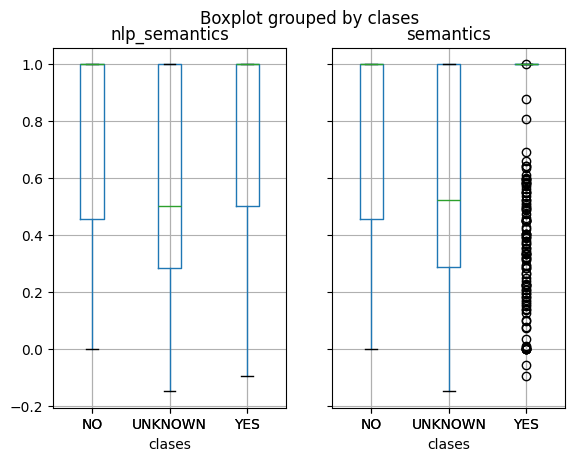

In [46]:
test.boxplot(by="clases",column=["nlp_semantics","semantics"])

In [47]:
#test = test[['sumas', 'mutinf', 'semantics',  'entropia_relaciones','Jaro-Winkler_rit','overlap_ent','clases']]
#test = test[['entropia_relaciones','Jaro-Winkler_rit','overlap_ent','no_match', 'contra', 'entail',  'neutral','clases']]
test = test[['negH','negT','mutinf','max_info','list_comp', 'list_incomp', 'rel_conceptuales','diferencias','entropia_relaciones','nlp_semantics','overlap_ent','Jaro-Winkler_rit','clases']]


In [48]:
X_t = test.drop(['clases'],axis=1)
y_t = test['clases']

In [49]:
# RTE3
y_test=[]
for i in y_t:
    if i == "YES":
        y_test.append(1)
    else:
        y_test.append(0)

In [50]:
scaler = preprocessing.MaxAbsScaler().fit(X_t)
X_scaled = scaler.transform(X_t)
X_test = X_scaled

# MODELO DE REGRESIÓN LÓGISTICA

In [51]:
X_train = np.where(np.isnan(X_train), 0, X_train)
X_train

array([[0.        , 0.        , 0.32427622, ..., 1.        , 0.5       ,
        0.        ],
       [0.        , 0.        , 0.56200638, ..., 1.        , 0.33333333,
        0.6       ],
       [0.        , 0.        , 0.90867873, ..., 1.        , 0.25      ,
        0.2       ],
       ...,
       [0.        , 0.        , 0.65567897, ..., 1.        , 0.5       ,
        0.66666667],
       [0.        , 0.        , 0.79094968, ..., 1.        , 1.        ,
        1.        ],
       [0.        , 0.        , 0.92913245, ..., 1.        , 0.66666667,
        0.4       ]])

In [52]:
X_train.shape

(800, 12)

In [53]:
model = LogisticRegression(penalty="l2", C=1)
model.fit(X_train,y_train)

LogisticRegression(C=1)

In [54]:
model.get_params()

{'C': 1,
 'class_weight': None,
 'dual': False,
 'fit_intercept': True,
 'intercept_scaling': 1,
 'l1_ratio': None,
 'max_iter': 100,
 'multi_class': 'auto',
 'n_jobs': None,
 'penalty': 'l2',
 'random_state': None,
 'solver': 'lbfgs',
 'tol': 0.0001,
 'verbose': 0,
 'warm_start': False}

In [55]:
model.decision_function(X_train)

array([ 0.78959251,  0.80000685,  0.76281543,  1.32362449,  1.11464592,
        1.52526633,  1.04501855, -1.69633657,  0.75288804, -1.06365197,
       -0.26911949,  1.2044894 ,  1.23931596, -0.46178096, -0.42169961,
        1.04741261,  0.46809617,  1.21641749, -1.14904462, -0.17422365,
        1.45656671, -0.05655639,  0.10644165,  1.08549579,  1.1296412 ,
        1.24653035,  1.31908723, -0.28964126,  0.64583732,  0.21988589,
        0.97765887,  0.97606615,  1.01269696,  0.83407835, -0.15913185,
        0.89238798,  1.04357533,  1.06723414, -0.66323587,  1.23629218,
        0.73828286, -0.57484759,  0.75919761,  0.94462401, -0.80091901,
        1.04939352,  1.01481019,  1.27193076,  1.08429899,  0.98170864,
       -0.92327528,  0.83223367, -0.78994506,  1.68231787,  0.98955276,
        1.080638  ,  1.10184509,  1.00703846,  0.99177936, -0.27549114,
        0.79519927, -0.24376297,  1.2716865 ,  0.57818694,  1.19144081,
        1.12995732,  0.90828281, -0.13656763,  1.13616618, -0.98

In [56]:
labels=train.columns[:-1]
labels

Index(['negH', 'negT', 'mutinf', 'max_info', 'list_comp', 'list_incomp',
       'rel_conceptuales', 'diferencias', 'entropia_relaciones',
       'nlp_semantics', 'overlap_ent', 'Jaro-Winkler_rit'],
      dtype='object')

In [57]:
model.classes_

array([0, 1])

In [58]:
model.coef_[0]

array([-0.08647442, -0.21664995, -0.79381098,  1.41689983, -0.28190333,
        0.16306837,  0.6412866 , -2.02372833, -2.07451067,  0.66641854,
        0.79628523,  0.20715712])

In [59]:
coeficientes=model.coef_[0]

In [60]:
coeficientes

array([-0.08647442, -0.21664995, -0.79381098,  1.41689983, -0.28190333,
        0.16306837,  0.6412866 , -2.02372833, -2.07451067,  0.66641854,
        0.79628523,  0.20715712])

In [61]:
print("Maximo,minimo ",np.argmax(coeficientes),labels[np.argmax(coeficientes)],np.argmin(coeficientes),labels[np.argmin(coeficientes)])

Maximo,minimo  3 max_info 8 entropia_relaciones


In [62]:
n_columns=train.shape[1]-1

In [63]:
n_columns

12

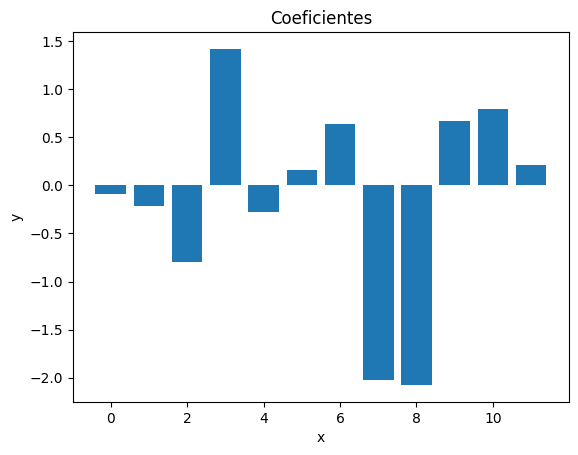

In [64]:
import matplotlib.pyplot as plt
import numpy as np

x_v = np.arange(0,n_columns,1)
y_v = coeficientes

plt.bar(x_v,y_v)
plt.xlabel('x')
plt.ylabel('y')
plt.title('Coeficientes')
plt.show()

In [65]:
X_test = np.where(np.isnan(X_test), 0, X_test)
X_test

array([[0.        , 0.        , 0.91931399, ..., 0.99999994, 0.66666667,
        0.4       ],
       [0.        , 0.        , 0.91830445, ..., 0.99999994, 0.33333333,
        0.6       ],
       [0.        , 0.        , 0.65416046, ..., 0.99999994, 0.66666667,
        0.75      ],
       ...,
       [0.        , 0.        , 0.99287573, ..., 0.99999994, 0.66666667,
        1.        ],
       [0.        , 0.        , 0.14208219, ..., 0.12950534, 0.66666667,
        0.25      ],
       [0.        , 0.        , 0.97457164, ..., 0.99999994, 1.        ,
        1.        ]])

In [66]:
X_test.shape

(800, 12)

In [67]:
predictions = model.predict(X_test)

In [68]:
predictions

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1,
       1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1,
       1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0,

In [69]:
test["predicciones"]=predictions
test

,negH,negT,mutinf,max_info,list_comp,list_incomp,rel_conceptuales,diferencias,entropia_relaciones,nlp_semantics,overlap_ent,Jaro-Winkler_rit,clases,predicciones
0,0,0,4.434350,0.858036,1,0,0,0.000000,0.000000,1.000000,0.666667,0.400000,YES,1
1,0,0,4.429481,0.885372,1,0,0,0.000000,0.000000,1.000000,0.333333,0.600000,YES,1
2,0,0,3.155371,0.750000,0,0,0,0.000000,0.000000,1.000000,0.666667,0.750000,YES,1
3,0,0,3.957290,0.833333,0,0,0,0.000000,0.000000,1.000000,1.000000,0.833333,YES,1
4,0,0,-0.540186,0.349208,0,0,0,0.058824,0.811278,0.369879,1.000000,0.750000,NO,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
795,0,1,4.383406,0.852755,2,0,0,0.000000,0.000000,1.000000,0.500000,0.400000,YES,1
796,0,0,3.178976,0.666667,0,0,0,0.000000,0.000000,1.000000,0.333333,0.666667,NO,1
797,0,0,4.789178,1.000000,0,0,0,0.000000,0.000000,1.000000,0.666667,1.000000,UNKNOWN,1
798,0,0,0.685339,0.652558,0,0,0,0.100000,0.811278,0.129505,0.666667,0.250000,UNKNOWN,0


<Axes: title={'center': 'list_incomp'}, xlabel='clases'>

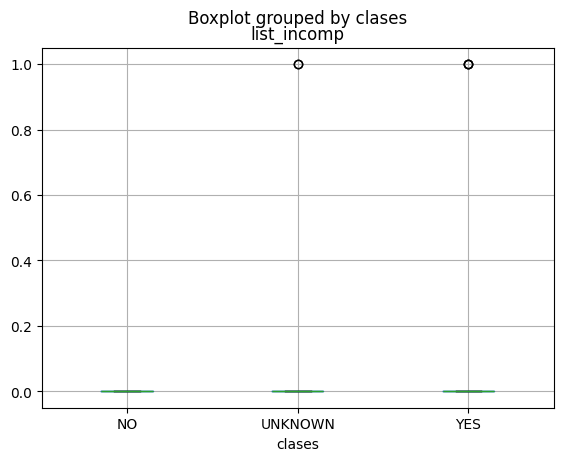

In [70]:
test.boxplot(by="clases",column=["list_incomp"])

In [71]:
incorrectos = test[(test["clases"]=="YES") & (test["predicciones"]==0)]
incorrectos

,negH,negT,mutinf,max_info,list_comp,list_incomp,rel_conceptuales,diferencias,entropia_relaciones,nlp_semantics,overlap_ent,Jaro-Winkler_rit,clases,predicciones
22,0,0,3.336707,0.586046,0,1,1,0.000000,1.370951,0.000000,1.000000,0.750000,YES,0
32,0,0,-0.497860,0.427851,0,0,0,0.076923,0.811278,0.312470,0.666667,0.500000,YES,0
42,0,0,3.669758,0.678677,2,0,0,0.055556,0.591673,0.216064,0.500000,0.571429,YES,0
46,0,0,-0.125811,0.521277,0,0,0,0.058824,0.650022,0.004352,0.666667,0.500000,YES,0
60,0,0,3.632409,0.676016,0,0,1,0.000000,0.721928,0.500000,0.333333,0.200000,YES,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
747,0,0,0.585537,0.269136,2,0,0,0.066667,0.591673,0.876006,0.250000,0.857143,YES,0
757,0,0,-0.127824,0.483748,0,0,0,0.071429,0.650022,0.370656,0.333333,0.500000,YES,0
772,0,1,0.534453,0.258479,1,0,0,0.041667,0.721928,0.548403,0.500000,0.400000,YES,0
777,0,0,4.318702,0.754097,1,0,1,0.000000,0.721928,0.500000,0.500000,0.400000,YES,0


In [72]:
print(confusion_matrix(y_test, predictions))

[[234 156]
 [103 307]]


In [73]:
#
# [[221 169]
#  [ 77 333]]
# [[230 160]
# [ 84 326]] 
#[[225 165]
#  [ 92 318]]
# [[236 154]
#  [106 304]]
# [[239 151]
#  [124 286]]
# acccuracy:  0.66
# precision:  0.65
# recall 0.7
# f1_score:  0.68
# matthews_score:  0.31
# acccuracy:  0.68
# precision:  0.66
# recall 0.74
# f1_score:  0.7
# matthews_score:  0.35

In [74]:
print("acccuracy: ",round(accuracy_score(y_test,predictions),2))
print("precision: ",round(precision_score(y_test,predictions),2))
print("recall",round(recall_score(y_test,predictions),2))
print("f1_score: ",round(f1_score(y_test,predictions),2))
print("matthews_score: ",round(matthews_corrcoef(y_test,predictions),2))

acccuracy:  0.68
precision:  0.66
recall 0.75
f1_score:  0.7
matthews_score:  0.35


In [75]:
X_train.shape

(800, 12)

In [76]:
X_test.shape

(800, 12)

In [77]:
X_cv=np.concatenate((X_train, X_test), axis=0)
Y_cv=np.concatenate((y_train, y_test), axis=0)

In [78]:
#validation_size = 0.20
#X_train_cv, X_validation_cv, Y_train_cv, Y_validation_cv = model_selection.train_test_split(X_cv, Y_cv, test_size=validation_size)
X_train_cv=X_cv
Y_train_cv=Y_cv

In [79]:
name='Logistic Regression'
kfold = model_selection.KFold(n_splits=10)
cv_results = model_selection.cross_val_score(model, X_train_cv, Y_train_cv, cv=kfold, scoring='accuracy')
msg = "%s: %f (%f)" % (name + " Acurracy:" , round(cv_results.mean(),2), cv_results.std())
cv_results = model_selection.cross_val_score(model, X_train_cv, Y_train_cv, cv=kfold, scoring='precision')
msg += "\n%s: %f (%f)" % (name+ " Precision:", round(cv_results.mean(),2), cv_results.std())
cv_results = model_selection.cross_val_score(model, X_train_cv, Y_train_cv, cv=kfold, scoring='recall')
msg += "\n%s: %f (%f)" % (name+ " Recall:", round(cv_results.mean(),2), cv_results.std())
cv_results = model_selection.cross_val_score(model, X_train_cv, Y_train_cv, cv=kfold, scoring='f1')
msg += "\n%s: %f (%f)" % (name+ " F1-score:", round(cv_results.mean(),2), cv_results.std())
print(msg)

Logistic Regression Acurracy:: 0.700000 (0.106793)
Logistic Regression Precision:: 0.730000 (0.131266)
Logistic Regression Recall:: 0.720000 (0.105906)
Logistic Regression F1-score:: 0.720000 (0.079808)


In [80]:
name='Logistic Regression'
kfold = model_selection.KFold(n_splits=10)
cv_results = model_selection.cross_val_score(model, X_train_cv, Y_train_cv, cv=kfold, scoring='precision_weighted')
msg = "\n%s: %f (%f)" % (name+ " Precision:", round(cv_results.mean(),2), cv_results.std())
cv_results = model_selection.cross_val_score(model, X_train_cv, Y_train_cv, cv=kfold, scoring='recall_weighted')
msg += "\n%s: %f (%f)" % (name+ " Recall:", round(cv_results.mean(),2), cv_results.std())
cv_results = model_selection.cross_val_score(model, X_train_cv, Y_train_cv, cv=kfold, scoring='f1_weighted')
msg += "\n%s: %f (%f)" % (name+ " F1-score:", round(cv_results.mean(),2), cv_results.std())
print(msg)


Logistic Regression Precision:: 0.710000 (0.105199)
Logistic Regression Recall:: 0.700000 (0.106793)
Logistic Regression F1-score:: 0.690000 (0.123945)


In [81]:
name='Logistic Regression'
kfold = model_selection.KFold(n_splits=10)
cv_results = model_selection.cross_val_score(model, X_train_cv, Y_train_cv, cv=kfold, scoring='precision_macro')
msg = "\n%s: %f (%f)" % (name+ " Precision:", round(cv_results.mean(),2), cv_results.std())
cv_results = model_selection.cross_val_score(model, X_train_cv, Y_train_cv, cv=kfold, scoring='recall_macro')
msg += "\n%s: %f (%f)" % (name+ " Recall:", round(cv_results.mean(),2), cv_results.std())
cv_results = model_selection.cross_val_score(model, X_train_cv, Y_train_cv, cv=kfold, scoring='f1_macro')
msg += "\n%s: %f (%f)" % (name+ " F1-score:", round(cv_results.mean(),2), cv_results.std())
print(msg)


Logistic Regression Precision:: 0.710000 (0.104448)
Logistic Regression Recall:: 0.700000 (0.111202)
Logistic Regression F1-score:: 0.680000 (0.126192)


In [82]:
name='Logistic Regression'
kfold = model_selection.KFold(n_splits=10)
cv_results = model_selection.cross_val_score(model, X_train_cv, Y_train_cv, cv=kfold, scoring='precision_micro')
msg = "\n%s: %f (%f)" % (name+ " Precision:", round(cv_results.mean(),2), cv_results.std())
cv_results = model_selection.cross_val_score(model, X_train_cv, Y_train_cv, cv=kfold, scoring='recall_micro')
msg += "\n%s: %f (%f)" % (name+ " Recall:", round(cv_results.mean(),2), cv_results.std())
cv_results = model_selection.cross_val_score(model, X_train_cv, Y_train_cv, cv=kfold, scoring='f1_micro')
msg += "\n%s: %f (%f)" % (name+ " F1-score:", round(cv_results.mean(),2), cv_results.std())
print(msg)


Logistic Regression Precision:: 0.700000 (0.106793)
Logistic Regression Recall:: 0.700000 (0.106793)
Logistic Regression F1-score:: 0.700000 (0.106793)


In [83]:
name='Logistic Regression'
kfold = model_selection.KFold(n_splits=20)
cv_results = model_selection.cross_val_score(model, X_train_cv, Y_train_cv, cv=kfold, scoring='matthews_corrcoef')
msg = "%s: %f (%f)" % (name, round(cv_results.mean(),2), cv_results.std())
print(msg)

Logistic Regression: 0.390000 (0.243528)


In [84]:
import shap
import pandas as pd
import numpy as np
shap.initjs()

IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html


In [85]:
#linear_model

In [86]:
#model = LogisticRegression()
#model.fit(X_train,y_train)

In [87]:
y_predict = model.predict(X_test)
print(classification_report( y_test,y_predict))
print(confusion_matrix( y_test,y_predict,labels=[1,0]))

              precision    recall  f1-score   support

           0       0.69      0.60      0.64       390
           1       0.66      0.75      0.70       410

    accuracy                           0.68       800
   macro avg       0.68      0.67      0.67       800
weighted avg       0.68      0.68      0.67       800

[[307 103]
 [156 234]]


In [88]:
#        precision    recall  f1-score   support

#            0       0.73      0.59      0.65       390
#            1       0.67      0.80      0.73       410

#     accuracy                           0.69       800
#    macro avg       0.70      0.69      0.69       800
# weighted avg       0.70      0.69      0.69       800

# [[326  84]
#  [160 230]]
#          precision    recall  f1-score   support

#            0       0.72      0.58      0.64       390
#            1       0.66      0.78      0.72       410

#     accuracy                           0.69       800
#    macro avg       0.69      0.68      0.68       800
# weighted avg       0.69      0.69      0.68       800

# [[320  90]
#  [162 228]]

In [89]:
#          precision    recall  f1-score   support

#            0       0.72      0.56      0.63       390
#            1       0.65      0.79      0.72       410

#     accuracy                           0.68       800
#    macro avg       0.69      0.67      0.67       800
# weighted avg       0.68      0.68      0.67       800

# [[324  86]
#  [172 218]]

In [90]:
#  precision    recall  f1-score   support

#            0       0.73      0.51      0.60       390
#            1       0.64      0.82      0.72       410

#     accuracy                           0.67       800
#    macro avg       0.68      0.66      0.66       800
# weighted avg       0.68      0.67      0.66       800

# [[338  72]
#  [193 197]]

In [91]:
#              precision    recall  f1-score   support

#            0       0.71      0.56      0.63       390
#            1       0.65      0.79      0.71       410

#     accuracy                           0.68       800
#    macro avg       0.68      0.67      0.67       800
# weighted avg       0.68      0.68      0.67       800

In [92]:
#    precision    recall  f1-score   support

#            0       0.73      0.54      0.62       390
#            1       0.65      0.81      0.72       410

#     accuracy                           0.68       800
#    macro avg       0.69      0.67      0.67       800
# weighted avg       0.69      0.68      0.67       800

In [93]:
# precision    recall  f1-score   support

#            0       0.69      0.61      0.64       390
#            1       0.66      0.74      0.70       410

#     accuracy                           0.68       800
#    macro avg       0.68      0.67      0.67       800
# weighted avg       0.68      0.68      0.67       800

In [94]:
explainer = shap.Explainer(model,X_train,feature_names=test.columns[:-2])
shap_values = explainer(X_test)

In [95]:
test.columns[:-2]

Index(['negH', 'negT', 'mutinf', 'max_info', 'list_comp', 'list_incomp',
       'rel_conceptuales', 'diferencias', 'entropia_relaciones',
       'nlp_semantics', 'overlap_ent', 'Jaro-Winkler_rit'],
      dtype='object')

In [96]:
explainer.expected_value

-0.1663961717198466

In [97]:
X_test

array([[0.        , 0.        , 0.91931399, ..., 0.99999994, 0.66666667,
        0.4       ],
       [0.        , 0.        , 0.91830445, ..., 0.99999994, 0.33333333,
        0.6       ],
       [0.        , 0.        , 0.65416046, ..., 0.99999994, 0.66666667,
        0.75      ],
       ...,
       [0.        , 0.        , 0.99287573, ..., 0.99999994, 0.66666667,
        1.        ],
       [0.        , 0.        , 0.14208219, ..., 0.12950534, 0.66666667,
        0.25      ],
       [0.        , 0.        , 0.97457164, ..., 0.99999994, 1.        ,
        1.        ]])

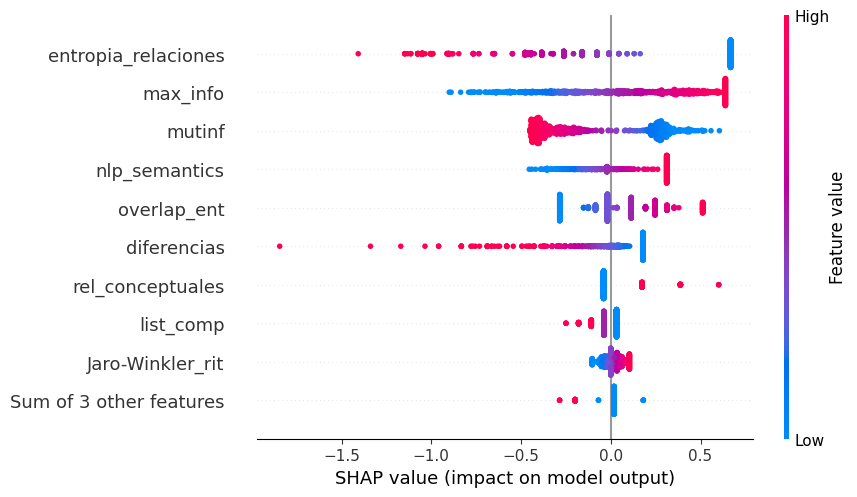

In [98]:
shap.plots.beeswarm(shap_values)

[0.54671232 0.34684775 0.12872415 0.15206629 0.2        0.05454545
 0.37562701 0.8        0.33333333] 0 1


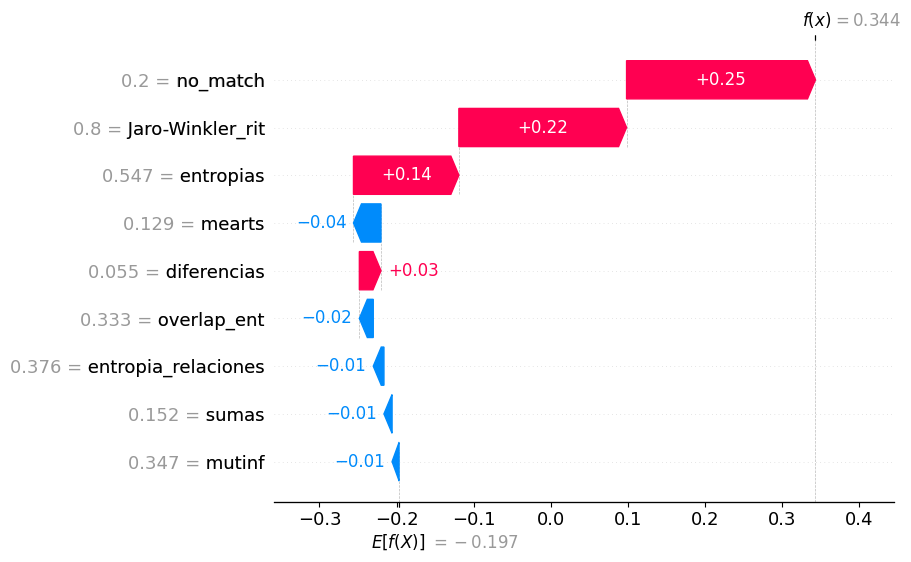

In [282]:
ind = 21
print(X_test[ind],y_test[ind],y_predict[ind])
shap.plots.force(shap_values[ind])
shap.plots.waterfall(shap_values[ind])

In [283]:
ind = 6
print(X_test[ind])
# This amazing documentary gives us a glimpse into the lives of the brave
# women in Cameroun's judicial system-- policewomen, lawyers and judges. Despite
# tremendous difficulties-- lack of means, the desperate poverty of the people, multiple
# languages and multiple legal precedents depending on the region of the country and
# the religious/ethnic background of the plaintiffs and defendants-- these brave,
# strong women are making a difference. [...]

shap.plots.waterfall(shap_values[ind,:,1])

[0.         0.         0.         0.         0.         0.
 0.         1.         0.66666667]


IndexError: index 1 is out of bounds for axis 2 with size 1

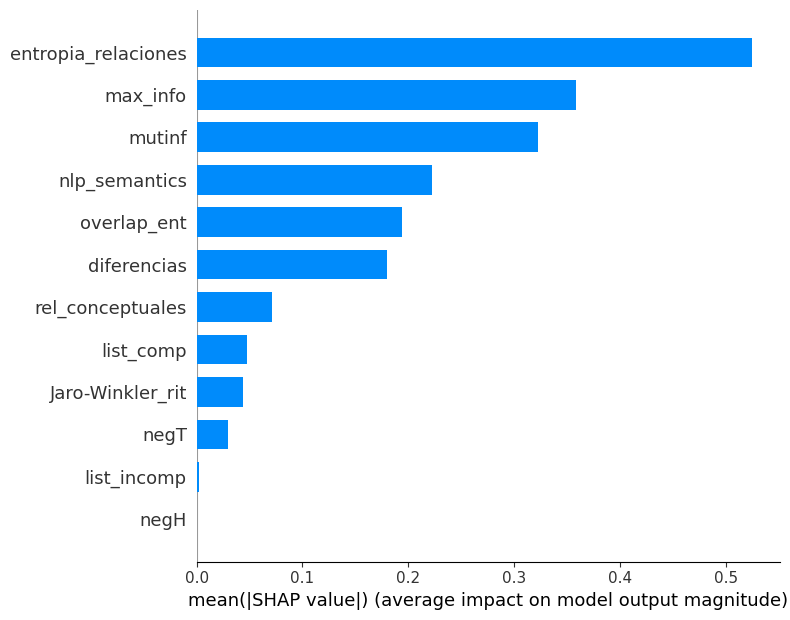

In [99]:
shap.summary_plot(shap_values, X_test,plot_type="bar")

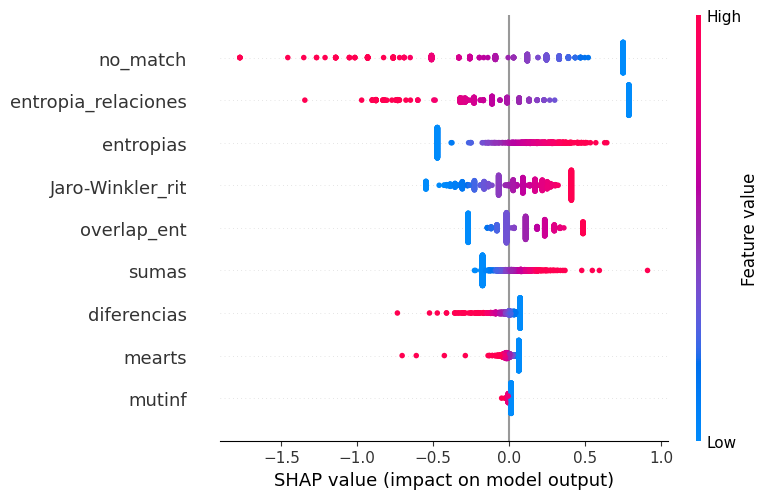

In [291]:
shap.summary_plot(shap_values[:,:,0])

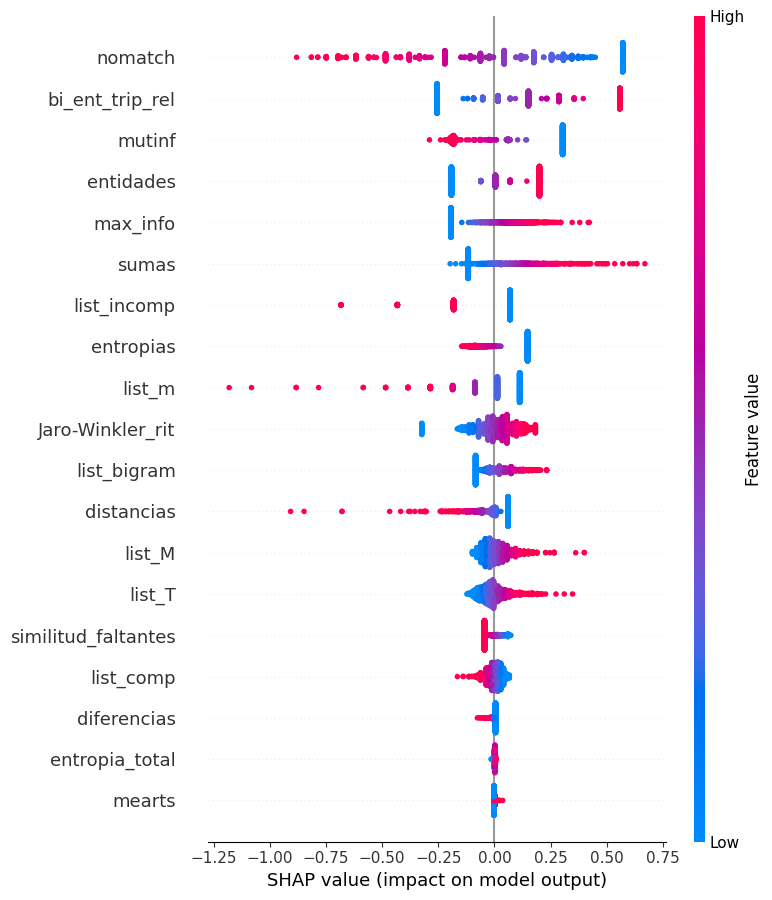

In [97]:
shap.summary_plot(shap_values, X_test,feature_names=test.columns[:-1])

In [ ]:
shap_values[2:,]

.values =
array([[ 0.00911714,  0.30959951,  0.55679351, -0.20535715,  0.21114683],
       [ 0.00911714,  0.30959951,  0.55679351, -0.20535715,  0.21114683],
       [-0.01299836, -0.11268555, -0.4045574 ,  0.04382668,  0.21114683],
       ...,
       [ 0.00911714,  0.30959951,  0.55679351, -0.20535715,  0.03866018],
       [ 0.00911714,  0.30959951,  0.55679351, -0.20535715,  0.03866018],
       [ 0.00911714,  0.30959951,  0.55679351, -0.20535715,  0.21114683]])

.base_values =
array([-0.74544388, -0.74544388, -0.74544388, -0.74544388, -0.74544388,
       -0.74544388, -0.74544388, -0.74544388, -0.74544388, -0.74544388,
       -0.74544388, -0.74544388, -0.74544388, -0.74544388, -0.74544388,
       -0.74544388, -0.74544388, -0.74544388, -0.74544388, -0.74544388,
       -0.74544388, -0.74544388, -0.74544388, -0.74544388, -0.74544388,
       -0.74544388, -0.74544388, -0.74544388, -0.74544388, -0.74544388,
       -0.74544388, -0.74544388, -0.74544388, -0.74544388, -0.74544388,
       -0.745

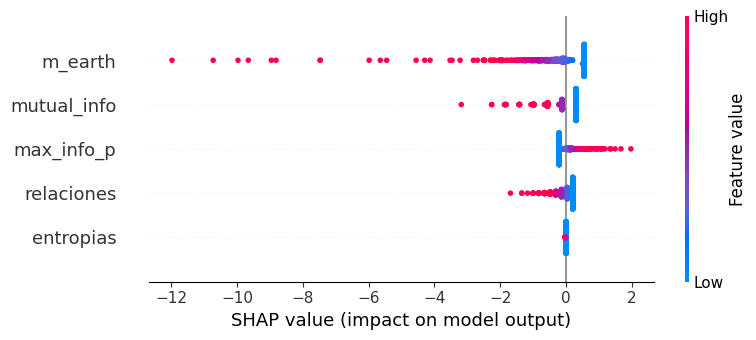

In [ ]:
shap.summary_plot(shap_values[0:,], X_test,feature_names=test.columns[:-1])

In [ ]:
explainer.expected_value

-0.7454438806409415

In [ ]:
shap_values.shape

(800, 5)

# Árbol de decisión

In [197]:
from sklearn.tree import DecisionTreeClassifier, plot_tree

In [204]:
clf = DecisionTreeClassifier(splitter="random",criterion='entropy')
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

In [205]:
print("acccuracy: ",round(accuracy_score(y_test,y_pred),2))
print("precision: ",round(precision_score(y_test,y_pred),2))
print("recall",round(recall_score(y_test,y_pred),2))
print("f1_score: ",round(f1_score(y_test,y_pred),2))
print("matthews_score: ",round(matthews_corrcoef(y_test,y_pred),2))

acccuracy:  0.65
precision:  0.64
recall 0.72
f1_score:  0.68
matthews_score:  0.3


In [206]:
validation_size = 0.01
X_train_cv, X_validation_cv, Y_train_cv, Y_validation_cv = model_selection.train_test_split(X_cv, Y_cv, test_size=validation_size)

In [207]:
name='DecisionTree'
kfold = model_selection.KFold(n_splits=10)
cv_results = model_selection.cross_val_score(clf, X_train_cv, Y_train_cv, cv=kfold, scoring='accuracy')
msg = "%s: %f (%f)" % (name, round(cv_results.mean(),2), cv_results.std())
cv_results = model_selection.cross_val_score(clf, X_train_cv, Y_train_cv, cv=kfold, scoring='precision')
msg += "\n%s: %f (%f)" % (name, round(cv_results.mean(),2), cv_results.std())
cv_results = model_selection.cross_val_score(clf, X_train_cv, Y_train_cv, cv=kfold, scoring='recall')
msg += "\n%s: %f (%f)" % (name, round(cv_results.mean(),2), cv_results.std())
cv_results = model_selection.cross_val_score(clf, X_train_cv, Y_train_cv, cv=kfold, scoring='f1')
msg += "\n%s: %f (%f)" % (name, round(cv_results.mean(),2), cv_results.std())
print(msg)

DecisionTree: 0.620000 (0.038039)
DecisionTree: 0.630000 (0.036153)
DecisionTree: 0.680000 (0.060250)
DecisionTree: 0.650000 (0.030989)


In [202]:
c=train.columns[:-1]
confusion_matrix(y_test,y_pred)

array([[256, 134],
       [183, 227]])

Profundidad del árbol: 22
Número de nodos terminales: 278


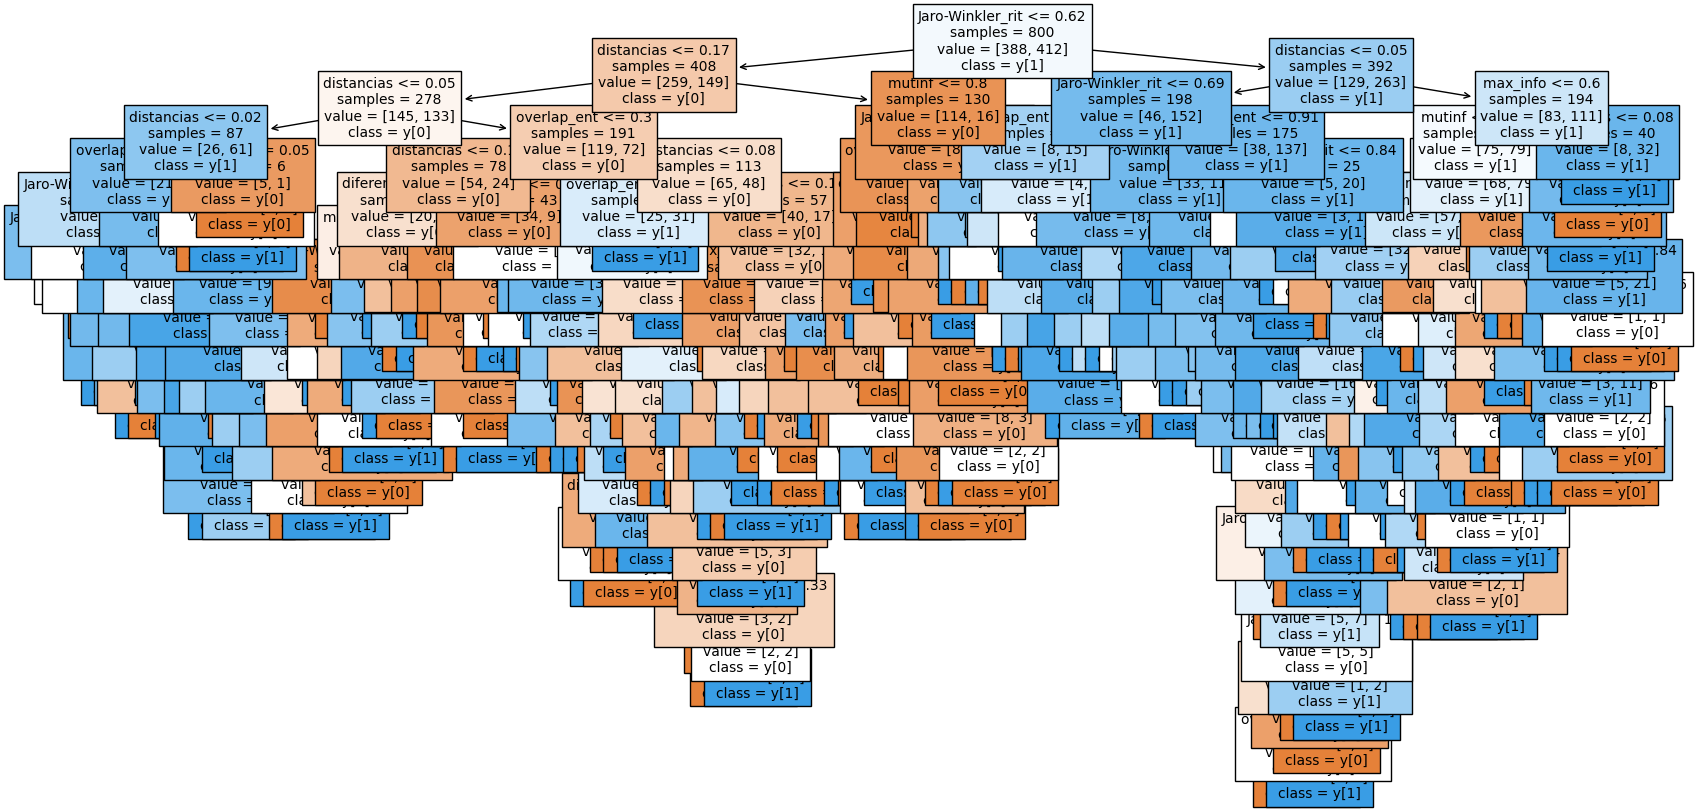

In [203]:
# Estructura del árbol creado
import matplotlib.pyplot as plt
# ------------------------------------------------------------------------------
fig, ax = plt.subplots(figsize=(20, 10))

print(f"Profundidad del árbol: {clf.get_depth()}")
print(f"Número de nodos terminales: {clf.get_n_leaves()}")

plot = plot_tree(
            decision_tree = clf,
            feature_names = c,
            class_names   = True,
            filled        = True,
            impurity      = False,
            fontsize      = 10,
            precision     = 2,
            ax            = ax
       )